# Movie Rating Prediction

![Movie_Rating.jpg](attachment:Movie_Rating.jpg)

**About this Project:**
* All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided some demographic information are included in this dataset.

In [71]:
# import libraries for data analysis
import numpy as np
import pandas as pd

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# warnings
import warnings
warnings.filterwarnings('ignore')

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


* **Acquire the datasets**

---



---



In [46]:
data = pd.read_csv('/content/movie_success_rate.csv')
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking for Missing values

In [47]:
data.isna().sum()

Rank                  1
Title                 1
Genre                 1
Description           1
Director              1
Actors                1
Year                  1
Runtime (Minutes)     1
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             1
Action                1
Adventure             1
Aniimation            1
Biography             1
Comedy                1
Crime                 1
Drama                 1
Family                1
Fantasy               1
History               1
Horror                1
Music                 1
Musical               1
Mystery               1
Romance               1
Sci-Fi                1
Sport                 1
Thriller              1
War                   1
Western               1
Success               1
dtype: int64

In [48]:
data.isna()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
835,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
836,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
837,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
data = data.fillna(df.median())


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                839 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                839 non-null    float64
 7   Runtime (Minutes)   839 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           839 non-null    float64
 12  Action              839 non-null    float64
 13  Adventure           839 non-null    float64
 14  Aniimation          839 non-null    float64
 15  Biography           839 non-null    float64
 16  Comedy  

* **Here we can observe column names and their data types.Now we've count 0 null values before.**
___

## Data Modeling


In [51]:
df=data
print(df['Genre'].value_counts())
print(df['Director'].value_counts())
print(df['Actors'].value_counts())

Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                           ..
Adventure,Drama,History     1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 189, dtype: int64
Ridley Scott          8
Paul W.S. Anderson    6
David Yates           6
Michael Bay           6
Antoine Fuqua         5
                     ..
Kyle Balda            1
Chris Renaud          1
Peter Billingsley     1
Lee Toland Krieger    1
Nima Nourizadeh       1
Name: Director, Length: 524, dtype: int64
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   2
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            2
Chris Pratt, Vin Diesel, Bradley 

In [52]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**1.** Visualize the distribution of top 25 movie genre and count the occurences.

In [53]:
Genre_Counts = df['Genre'].value_counts()

In [54]:
top_25 = Genre_Counts.head(25)

<Axes: title={'center': 'Top 25 Movie Genre'}, xlabel='Movies', ylabel='Movie Count'>

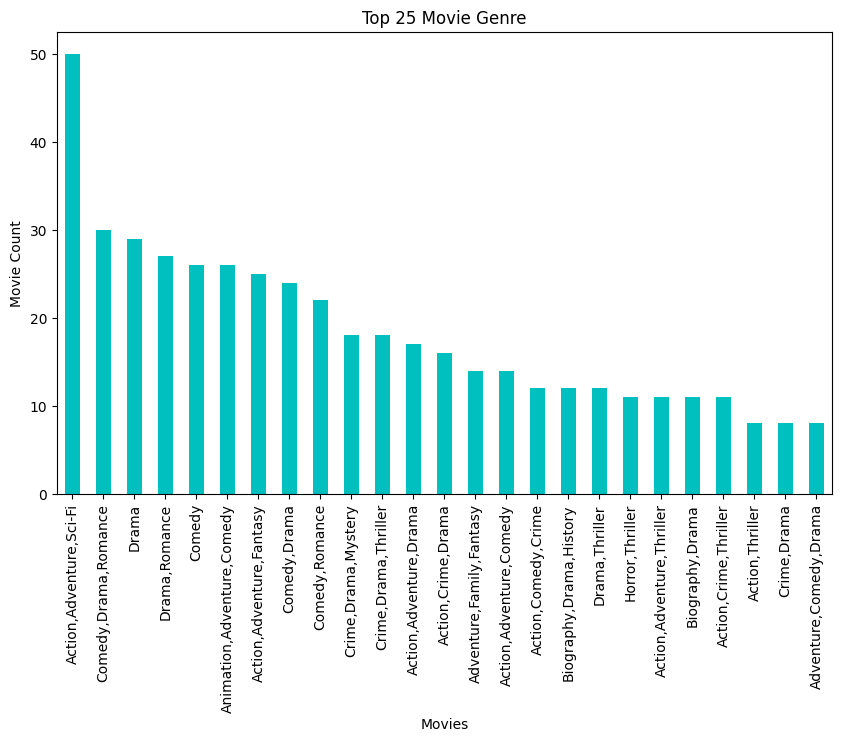

In [55]:
plt.figure(figsize=(10,6))
top_25.plot(kind='bar', color='c', title='Top 25 Movie Genre', ylabel='Movie Count', xlabel='Movies')

* Action and Adventure moives are the highest among other genres.
* Comedy movies are the second whihch are 500+ among other genres.

___
**2.** Visualize the distribution of movie ratings and count the how many of ratings occured.

In [56]:
Movie_rating = df['Rating'].value_counts(ascending=True)

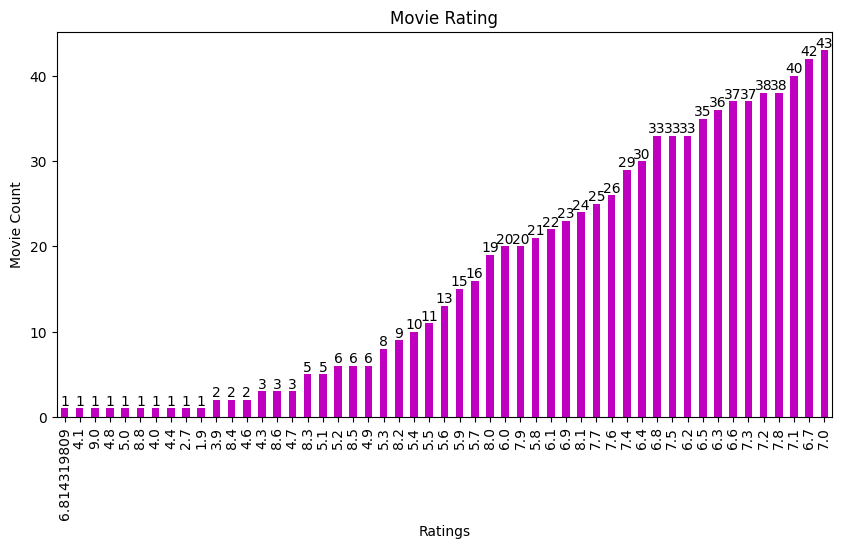

In [57]:
plt.figure(figsize=(10,5))
rating= Movie_rating.plot(kind='bar', color='m', title='Movie Rating', ylabel='Movie Count', xlabel='Ratings')

for index, value in enumerate(Movie_rating):
    rating.annotate(str(value), xy=(index, value), ha='center', va='bottom')

___
**3.** Visualize and calculate the average or total number of ratings for each genre and visualize the most popular genres.

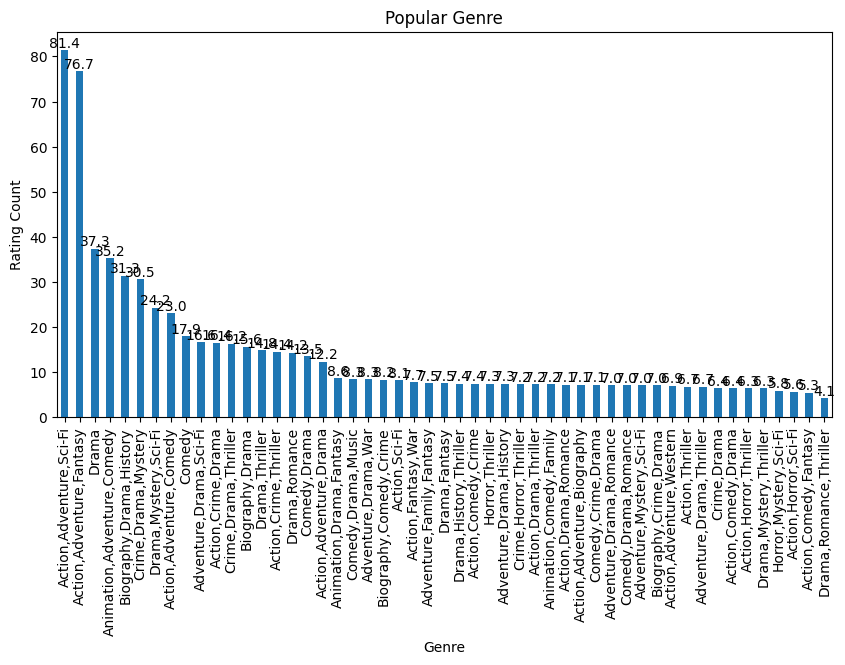

In [58]:
top_25 = df.head(100)

genre_sum_ratings = top_25.groupby('Genre')['Rating'].sum()

genre_sort_ratings = genre_sum_ratings.sort_values(ascending=False)

plt.figure(figsize=(10,5))

popular_genre = genre_sort_ratings.plot(kind='bar', title='Popular Genre', xlabel='Genre', ylabel='Rating Count')

for index, value in enumerate(genre_sort_ratings):
    popular_genre.annotate(str(value), xy=(index, value), ha='center', va='bottom')

**Note: There are many rows in this dataset like nearly 3000+. so I am taking top 100 to know the most popular genre.**
* Most of the ratings occured to Action Movies in Top 100.
* Second most ratings occured to Fantsy Moives in Top 100.
* Followed by Drama, Comedy got so many ratings in Top 100.

___
## Preparing Data Model

In [59]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Took some Top 100 rows to prepare and train the mdoel.

In [60]:
Top_100 = df[100:]
Top_100.dropna(inplace=True)

In [61]:
x = df[['Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']]
y = df['Success']

___
##  Training the Model

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [63]:
x_train

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
145,2006.0,144.0,8.0,495106.0,167.01,80.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
309,2007.0,127.0,7.7,220664.0,38.35,66.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,2014.0,108.0,6.2,21715.0,4.40,79.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,2015.0,119.0,7.1,188017.0,110.82,75.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
411,2013.0,91.0,6.9,111558.0,1.01,61.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2013.0,180.0,8.2,865134.0,116.87,75.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,2014.0,139.0,6.7,362093.0,150.83,48.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
270,2008.0,97.0,5.5,67033.0,48.24,55.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
435,2012.0,106.0,6.8,278379.0,179.02,58.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
x_test

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
211,2013.0,125.0,5.9,96852.0,26.62,35.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
825,2007.0,133.0,7.4,95172.0,24.34,56.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,2016.0,128.0,7.4,162122.0,86.20,51.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,2006.0,151.0,7.3,552027.0,423.03,53.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
792,2016.0,120.0,6.2,4669.0,0.22,82.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,2007.0,111.0,8.0,504039.0,206.44,96.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,2015.0,137.0,7.2,301249.0,350.03,67.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
582,2013.0,115.0,6.7,188004.0,25.12,49.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
290,2015.0,106.0,6.0,71149.0,27.36,34.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


___
## Model Development

In [65]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [68]:
log.score(x_test,y_test)

0.9206349206349206

In [72]:
clf = confusion_matrix(y_test,log.predict(x_test))

___
## Saving the Model

In [73]:
import pickle

In [74]:
with open('Movie Rating', 'wb') as m:
    pickle.dump(lg,m)

In [75]:
with open('Movie Rating', 'rb') as m:
    model = pickle.load(m)

In [77]:
import joblib

## Thank You!